In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Load MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]
print(F"Training Data Count = {n_train} Testing Data Count = {n_test}")

Training Data Count = 60000 Testing Data Count = 10000


#### Normalize data to be in the range [0,1]

In [3]:
x_test = x_test / 127.5 - 1
x_train = x_train / 127.5 - 1

#### Reshape  the Training & Test Data from 3-D to 2-D array  

In [4]:
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

### Task 1: Data Visualization using PCA

1. PCA instance is created with n_components=2, that data needs to be represented in 2-D space.
2. PCA is fit to the training data, and x_train_pca contains the 2-D representations of the images.
3. The results are plotted using a scatter plot, where each point represents an image, and the color indicates its label.
4. This projection visually represents the data in a 2-D space, where similar images are likely to be close to each other, and you can see how the data clusters. Note that PCA reduces the dimensionality while trying to preserve as much variance as possible, but it doesn't necessarily preserve the class separability, which is essential for tasks like classification. For classification tasks, PCA is used for dimensionality reduction before feeding the data into a classifier.


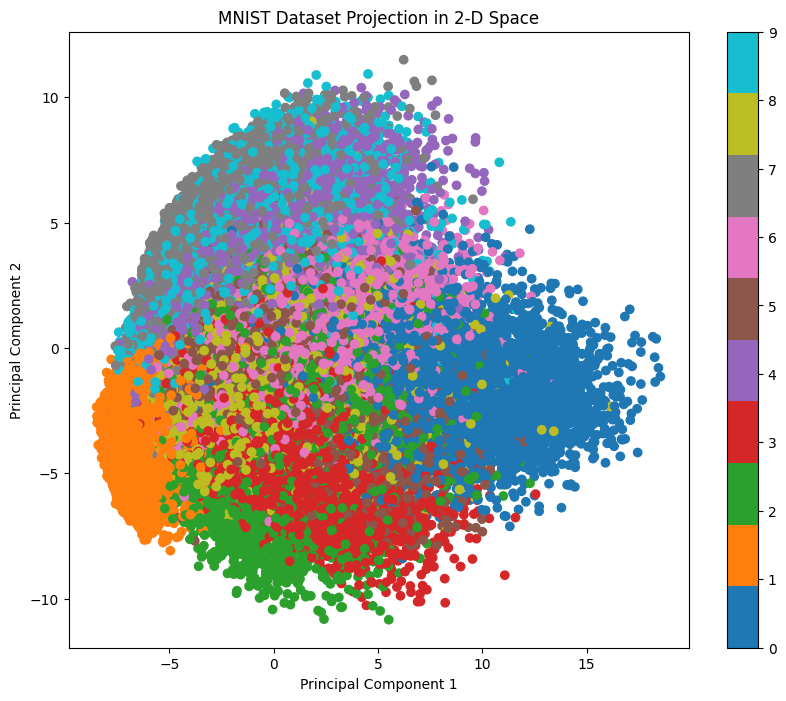

In [5]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Scatter plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10')
plt.colorbar(scatter)
plt.title('MNIST Dataset Projection in 2-D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Task 2: Perceptron

In [6]:
print(F"Shape of x_train = {x_train.shape} and y_train = {y_train.shape}")

Shape of x_train = (60000, 784) and y_train = (60000,)


In [7]:
# Get training data corresponding to digits 0 and 1 and
# Convert binary_x_train and binary_y_train to arrays of signed integers
train_cond = (y_train == 0) + (y_train == 1)
binary_x_train = x_train[train_cond,:].astype(np.int8)
binary_y_train = y_train[train_cond].astype(np.int8)
binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1

# Get test data corresponding to digits 0 and 1 and
# Convert binary_x_test and binary_y_test to arrays of signed integers
test_cond = (y_test == 0) + (y_test == 1)
binary_x_test = x_test[test_cond,:].astype(np.int8)
binary_y_test = y_test[test_cond].astype(np.int8)
binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1

print(f"binary_x_train shape = {binary_x_train.shape}, binary_y_train shape = {binary_y_train.shape}")

binary_x_train shape = (12665, 784), binary_y_train shape = (12665,)


#### Task 2.1 : Complete the Predict Function

In [8]:
# Perceptron prediction algorithm
#1. Calculate dot product of data_input array and weights
#2. Add bias
#3. If sum > 0 return 1 else return -1
def predict(X, weights, bias):
    predicted = np.dot(X, weights) + bias
    predicted[predicted > 0] = 1
    predicted[predicted <= 0] = -1
    return  predicted

In [9]:
#Calculate classification_error
def calculate_classification_error(predicted, actual):
    if len(predicted) != len(actual):
        raise ValueError("The lengths of the predicted and actual vectors are not same.")
    misclassified = 0
    for i in range(len(predicted)):
        if predicted[i] != actual[i]:
            misclassified += 1
    classification_error = misclassified / len(predicted)
    return classification_error

#### Task 2.2 :  Single Layer Perceptron algorithm

In [10]:
classification_errors = []
epochs = []

# Optimise Function for training the Perceptron
#1. Take current weight and bias and pass to predict
#2. From the predicted value update the weights and bias by learning rate
#3. new weight = old_weight + (learning_rate*(actual_val - predicted_val))*data_input
def optimise(X, y, learning_rate=0.5, max_iters=100):
    i = 0
    n,m = X.shape
    w = np.random.rand(m)
    b = np.random.rand()
    error = np.inf

    while (i<max_iters) & (error > 1e-3):
        prediction = predict(X, w, b)
        w = w + learning_rate * np.dot((y - prediction) , X)
        b = b - learning_rate * np.mean(prediction-y)

        #for each iteration append the classification_error
        error = calculate_classification_error(prediction, y)
        classification_errors.append(error)
        epochs.append(i + 1)
        i=i+1

    #Return the final weights, final bias and final classification_error
    return w,b ,error


#print(f"Shape of input and labels = {binary_x_train.shape} {binary_y_train.shape}")

In [11]:
# Train the perceptron with binary_x_train and binary_y_train
w = np.random.rand(binary_x_train.shape[1])

trained_weights,bias,c_error = optimise(binary_x_train,binary_y_train)
print(f"Trained_weights shape = {trained_weights.shape}, bias = {bias}, classification error = {c_error}")

Trained_weights shape = (784,), bias = -0.14141118993100713, classification error = 0.0031583103039873666


In [12]:
# Step 5: Evaluate the model
pred = predict(binary_x_test,trained_weights,bias)



correct = 0
total = binary_x_test.shape[0]

for i in range(total):
     if pred[i] == binary_y_test[i]:
        correct += 1

accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.81%


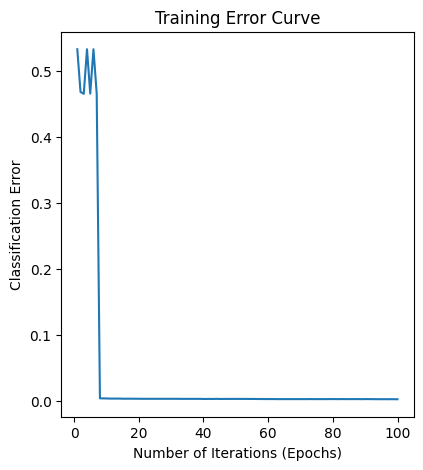

In [13]:
# Plot the training error curve
plt.figure(figsize=(10, 5))  # Increase figure size
plt.subplot(1, 2, 1)
plt.plot(epochs, classification_errors)
plt.title("Training Error Curve")
plt.xlabel("Number of Iterations (Epochs)")
plt.ylabel("Classification Error")
plt.show()



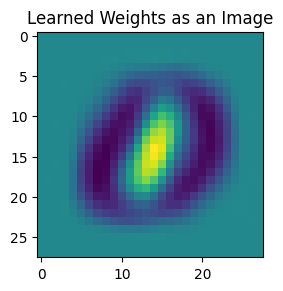

In [14]:
plt.subplot(1, 2, 2)
learned_weights_image = trained_weights.reshape(28, 28)
plt.imshow(learned_weights_image, cmap='viridis')
plt.title("Learned Weights as an Image")
plt.show()

### Task 3: Multi Layer Perceptron

#### Task 3.1: Create a MLP neural network architecture of the form [784,1000,1000,10]

##### Function to Plot training and Testing Accuracy

In [15]:
def plotAccuracy(model_history):
    #training_history = history.history

    # Fetch training and testing accuracy from the history dict
    training_accuracy = model_history['accuracy']
    validation_accuracy = model_history['val_accuracy']

    # Create a list of epoch numbers for the x-axis
    epochs = range(1, len(training_accuracy) + 1)

    # Plot the training and validation accuracy curves
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'r', label='Testing Accuracy')
    plt.title('Training and Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

In [16]:
#Create one-hot encoded matrices of labels
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]
print (f"One Hot encoded training label shape = {y_train_oh.shape} and Testing label shape =  {y_test_oh.shape}")
# Define the MLP model with 2-Hidden Layers with following setup:
# number of input nodes : 10
# number of nodes in 1st hidden layer = 1000, activation function : ReLU
# number of nodes in 2nd hidden layer = 1000, activation function : ReLU
# number of nodes in output layer = 10, activation function : softmax
model = Sequential([
    Dense(1000, activation='relu', input_shape=(784,)),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with specified batch size and number of epochs
history = model.fit(x_train, y_train_oh, batch_size=50, epochs=10, validation_data=(x_test, y_test_oh))


One Hot encoded training label shape = (60000, 10) and Testing label shape =  (10000, 10)
Epoch 1/10
1200/1200 [==============================] - 39s 32ms/step - loss: 0.2589 - accuracy: 0.9205 - val_loss: 0.1473 - val_accuracy: 0.9558
Epoch 2/10
1200/1200 [==============================] - 36s 30ms/step - loss: 0.1316 - accuracy: 0.9595 - val_loss: 0.1206 - val_accuracy: 0.9622
Epoch 3/10
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1004 - accuracy: 0.9693 - val_loss: 0.1404 - val_accuracy: 0.9546
Epoch 4/10
1200/1200 [==============================] - 36s 30ms/step - loss: 0.0810 - accuracy: 0.9743 - val_loss: 0.1092 - val_accuracy: 0.9692
Epoch 5/10
1200/1200 [==============================] - 36s 30ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.0856 - val_accuracy: 0.9737
Epoch 6/10
1200/1200 [==============================] - 39s 33ms/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.0978 - val_accuracy: 0.9739
Epoch 7/10
1200/1200 [============

In [17]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(x_train, y_train_oh, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_oh, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 99.03%
Test Accuracy: 97.66%


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1796010 (6.85 MB)
Trainable params: 1796010 (6.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


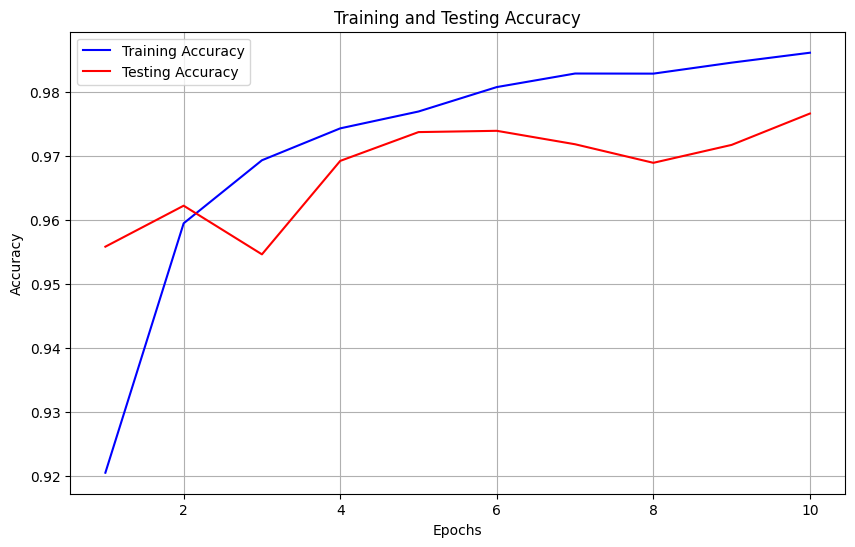

In [19]:
plotAccuracy(history.history)

#### Task 3.2 : Train 4 different networks

In [20]:
#Create a dict of models
model_dict = {}

##### Model with 3 Hidden Layers

In [21]:
##Model with 3 hidden layers

model_3 = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
model_3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with specified batch size and number of epochs
history_3 = model_3.fit(x_train, y_train_oh, batch_size=50, epochs=10, validation_data=(x_test, y_test_oh))
model_dict[3]=[model_3,history_3]

Epoch 1/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.2905 - accuracy: 0.9095 - val_loss: 0.1639 - val_accuracy: 0.9481
Epoch 2/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.1470 - accuracy: 0.9547 - val_loss: 0.1255 - val_accuracy: 0.9610
Epoch 3/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.1135 - accuracy: 0.9641 - val_loss: 0.1011 - val_accuracy: 0.9678
Epoch 4/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0981 - accuracy: 0.9695 - val_loss: 0.1193 - val_accuracy: 0.9640
Epoch 5/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0818 - accuracy: 0.9737 - val_loss: 0.0918 - val_accuracy: 0.9728
Epoch 6/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0725 - accuracy: 0.9772 - val_loss: 0.0933 - val_accuracy: 0.9744
Epoch 7/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.0915 - val_accur

##### Model with 4 Hidden Layers

In [22]:
##Model with 4 hidden layers

model_4 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
model_4.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with specified batch size and number of epochs
history_4 = model_4.fit(x_train, y_train_oh, batch_size=50, epochs=10, validation_data=(x_test, y_test_oh))
model_dict[4]=[model_4,history_4]

Epoch 1/10
1200/1200 [==============================] - 19s 15ms/step - loss: 0.2899 - accuracy: 0.9109 - val_loss: 0.1624 - val_accuracy: 0.9489
Epoch 2/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.1471 - accuracy: 0.9548 - val_loss: 0.1334 - val_accuracy: 0.9595
Epoch 3/10
1200/1200 [==============================] - 15s 13ms/step - loss: 0.1141 - accuracy: 0.9640 - val_loss: 0.1344 - val_accuracy: 0.9591
Epoch 4/10
1200/1200 [==============================] - 15s 13ms/step - loss: 0.0982 - accuracy: 0.9689 - val_loss: 0.1130 - val_accuracy: 0.9661
Epoch 5/10
1200/1200 [==============================] - 15s 13ms/step - loss: 0.0819 - accuracy: 0.9744 - val_loss: 0.1020 - val_accuracy: 0.9699
Epoch 6/10
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0721 - accuracy: 0.9770 - val_loss: 0.1301 - val_accuracy: 0.9606
Epoch 7/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.1075 -

##### Model with 5 Hidden Layers

In [23]:
##Model with 5 hidden layers

model_5 = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
model_5.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with specified batch size and number of epochs
history_5 = model_5.fit(x_train, y_train_oh, batch_size=50, epochs=10, validation_data=(x_test, y_test_oh))
model_dict[5]=[model_5,history_5]

Epoch 1/10
1200/1200 [==============================] - 38s 31ms/step - loss: 0.3084 - accuracy: 0.9028 - val_loss: 0.2278 - val_accuracy: 0.9304
Epoch 2/10
1200/1200 [==============================] - 33s 28ms/step - loss: 0.1540 - accuracy: 0.9537 - val_loss: 0.1198 - val_accuracy: 0.9660
Epoch 3/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.1194 - accuracy: 0.9642 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 4/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.1005 - accuracy: 0.9698 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 5/10
1200/1200 [==============================] - 34s 28ms/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.1509 - val_accuracy: 0.9606
Epoch 6/10
1200/1200 [==============================] - 32s 26ms/step - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.1191 - val_accuracy: 0.9639
Epoch 7/10
1200/1200 [==============================] - 33s 27ms/step - loss: 0.0706 - accuracy: 0.9785 - val_loss: 0.1012 -

##### Model with 7 Hidden Layers

In [24]:
##Model with 7 hidden layers

model_7 = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
model_7.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with specified batch size and number of epochs
history_7 = model_7.fit(x_train, y_train_oh, batch_size=50, epochs=10, validation_data=(x_test, y_test_oh))
model_dict[7]=[model_7,history_7]

Epoch 1/10
1200/1200 [==============================] - 44s 35ms/step - loss: 0.3830 - accuracy: 0.8838 - val_loss: 0.2133 - val_accuracy: 0.9357
Epoch 2/10
1200/1200 [==============================] - 34s 28ms/step - loss: 0.1697 - accuracy: 0.9518 - val_loss: 0.1299 - val_accuracy: 0.9626
Epoch 3/10
1200/1200 [==============================] - 34s 28ms/step - loss: 0.1291 - accuracy: 0.9621 - val_loss: 0.1301 - val_accuracy: 0.9621
Epoch 4/10
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1048 - accuracy: 0.9691 - val_loss: 0.1104 - val_accuracy: 0.9664
Epoch 5/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.0930 - accuracy: 0.9725 - val_loss: 0.0986 - val_accuracy: 0.9721
Epoch 6/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 7/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.0776 - accuracy: 0.9783 - val_loss: 0.0975 -

In [25]:
# For each model check the Model structure
for key, mdl in model_dict.items():
    mdl[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Par

Training Accuracy for model with 3-Hidden Layers: 98.47%
Test Accuracy for model with 3-Hidden Layers: 96.98%


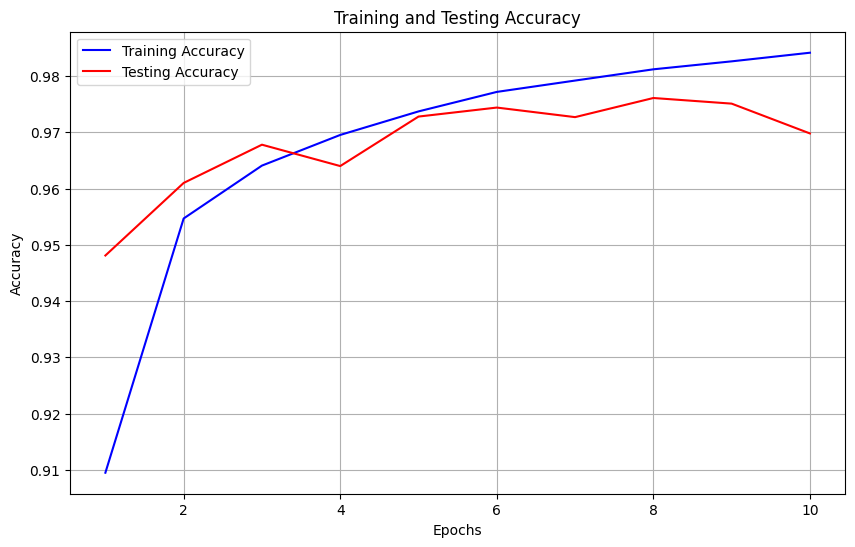

Training Accuracy for model with 4-Hidden Layers: 98.45%
Test Accuracy for model with 4-Hidden Layers: 97.38%


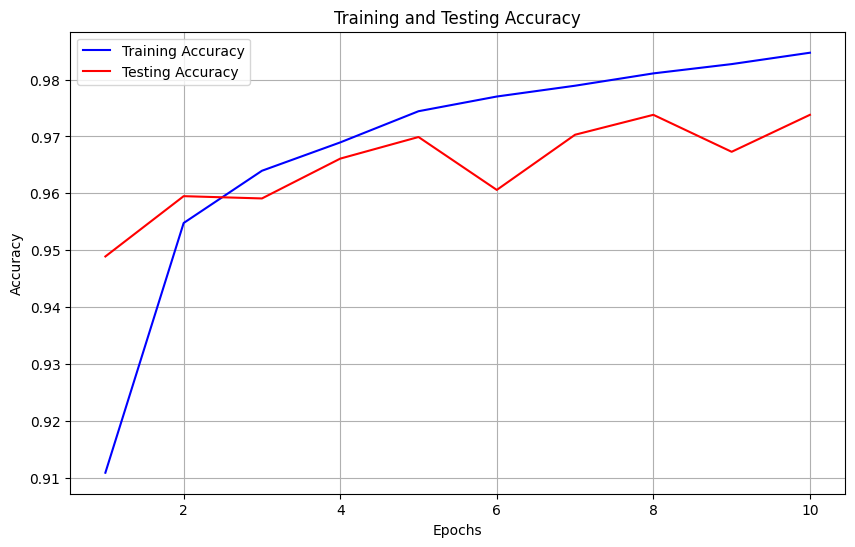

Training Accuracy for model with 5-Hidden Layers: 98.99%
Test Accuracy for model with 5-Hidden Layers: 97.85%


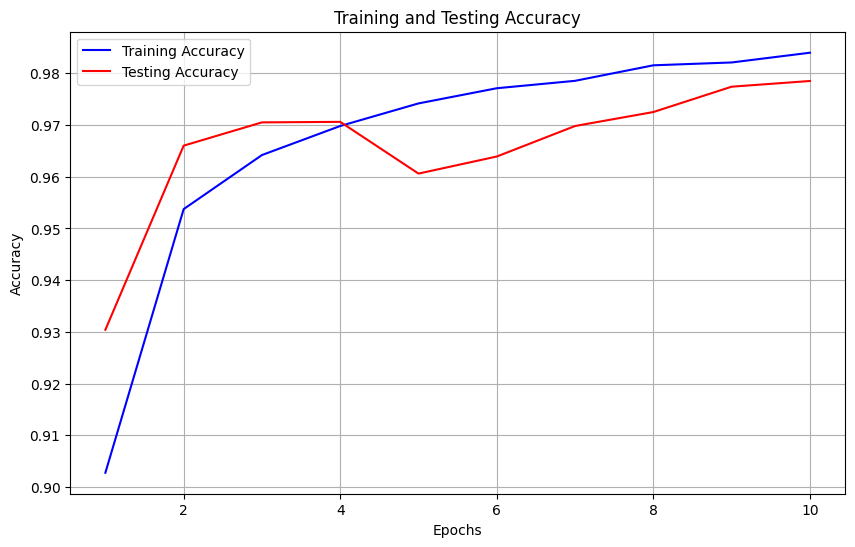

Training Accuracy for model with 7-Hidden Layers: 98.45%
Test Accuracy for model with 7-Hidden Layers: 97.08%


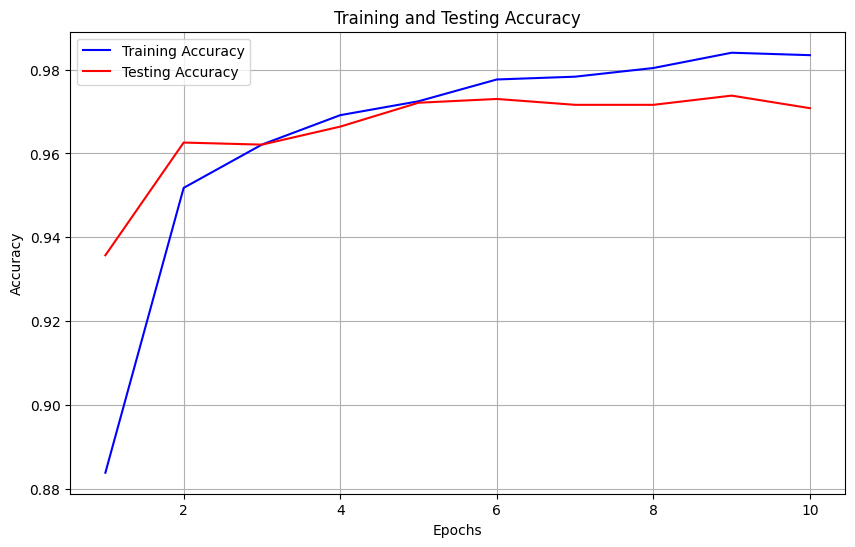

In [26]:
# Evaluate the model on the training data
for key, mdl in model_dict.items():
    train_loss, train_accuracy = mdl[0].evaluate(x_train, y_train_oh, verbose=0)
    print(f"Training Accuracy for model with {key}-Hidden Layers: {train_accuracy * 100:.2f}%")

    # Evaluate the model on the test data
    test_loss, test_accuracy = mdl[0].evaluate(x_test, y_test_oh, verbose=0)
    print(f"Test Accuracy for model with {key}-Hidden Layers: {test_accuracy * 100:.2f}%")
    #plot the training and test accuracy
    plotAccuracy(mdl[1].history)

### Task 4 : Create a CNN Architecture

##### Task 4.1 : Create a CNN architecture of the shape [32, 64, 128]

In [27]:
# ReLoad the MNIST dataset for CNN, no reshape required the
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_test_cnn = x_test_cnn / 127.5 - 1
x_train_cnn = x_train_cnn / 127.5 - 1
#x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to add a channel (MNIST is grayscale channel = 1)
x_train_cnn = x_train_cnn[..., tf.newaxis]
x_test_cnn = x_test_cnn[..., tf.newaxis]

# Convert label vectors to one-hot encoded matrices
y_one_hot_train_cnn = to_categorical(y_train_cnn, num_classes=10)
y_one_hot_test_cnn = to_categorical(y_test_cnn, num_classes=10)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
    Conv2D(128, (4, 4), strides=(2, 2), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


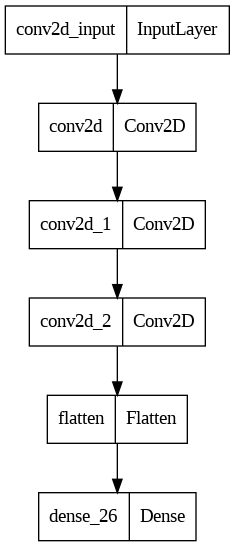

In [28]:
## Visualise the CNN Model
tf.keras.utils.plot_model(cnn_model)

In [29]:
# Train the model
cnn_history = cnn_model.fit(x_train_cnn, y_one_hot_train_cnn, batch_size=64, epochs=10, validation_data=(x_test_cnn, y_one_hot_test_cnn))

# Evaluate the model on training data
train_loss, train_accuracy = cnn_model.evaluate(x_train_cnn, y_one_hot_train_cnn, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test_cnn, y_one_hot_test_cnn, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
938/938 [==============================] - 94s 99ms/step - loss: 0.1407 - accuracy: 0.9575 - val_loss: 0.0477 - val_accuracy: 0.9844
Epoch 2/10
938/938 [==============================] - 91s 97ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 3/10
938/938 [==============================] - 93s 99ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0446 - val_accuracy: 0.9861
Epoch 4/10
938/938 [==============================] - 95s 102ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 5/10
938/938 [==============================] - 91s 97ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 6/10
938/938 [==============================] - 91s 97ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 7/10
938/938 [==============================] - 91s 97ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0405 - val_accuracy

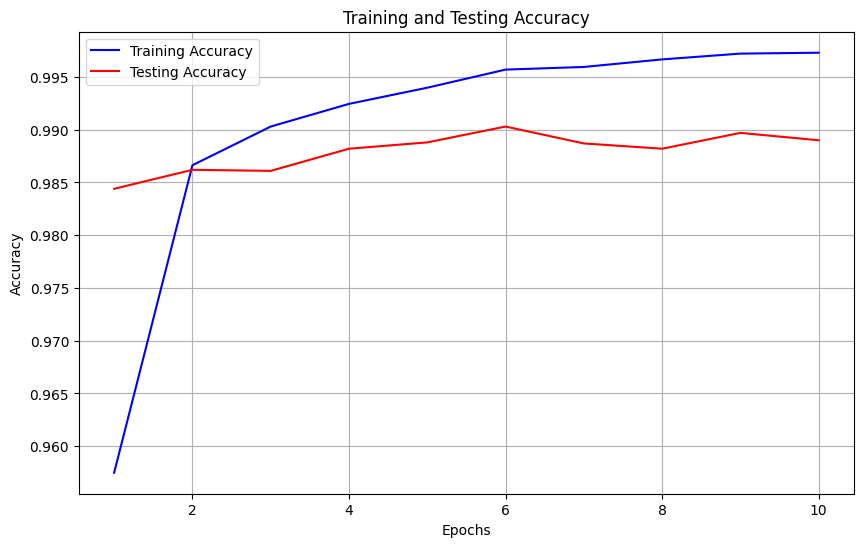

In [30]:
plotAccuracy(cnn_history.history)

In [50]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 10)                20490     
                                                                 
Total params: 185066 (722.91 KB)
Trainable params: 185066 (722.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
### Task 4.2 : CNNs with different layers (2,4 & 5)

In [46]:
cnn_model_2 = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
cnn_model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Train the model
cnn_history_2 = cnn_model_2.fit(x_train_cnn, y_one_hot_train_cnn, batch_size=64, epochs=10, validation_data=(x_test_cnn, y_one_hot_test_cnn))

# Evaluate the model on training data
train_loss_2, train_accuracy_2 = cnn_model_2.evaluate(x_train_cnn, y_one_hot_train_cnn, verbose=0)
print(f"Training Accuracy for CNN Model with 2 Conv Layers: {train_accuracy_2 * 100:.2f}%")

# Evaluate the model on test data
test_loss_2, test_accuracy_2 = cnn_model_2.evaluate(x_test_cnn, y_one_hot_test_cnn, verbose=0)
print(f"Test Accuracy for CNN Model with 2 Conv Layers: {test_accuracy_2 * 100:.2f}%")

Epoch 1/10
938/938 [==============================] - 67s 70ms/step - loss: 0.1520 - accuracy: 0.9546 - val_loss: 0.0515 - val_accuracy: 0.9837
Epoch 2/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0462 - val_accuracy: 0.9840
Epoch 3/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0430 - val_accuracy: 0.9863
Epoch 4/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9875
Epoch 5/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 6/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0534 - val_accuracy: 0.9857
Epoch 7/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0482 - val_accuracy:

In [51]:
cnn_model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        32832     
                                                                 
 flatten_9 (Flatten)         (None, 7744)              0         
                                                                 
 dense_35 (Dense)            (None, 10)                77450     
                                                                 
Total params: 110826 (432.91 KB)
Trainable params: 110826 (432.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cnn_model_4 = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
    Conv2D(128, (4, 4), strides=(2, 2), activation='relu'),
    Conv2D(256, (4, 4), strides=(2, 2), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
cnn_model_4.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# Train the model
cnn_history_4 = cnn_model_4.fit(x_train_cnn, y_one_hot_train_cnn, batch_size=64, epochs=10, validation_data=(x_test_cnn, y_one_hot_test_cnn))

# Evaluate the model on training data
train_loss_4, train_accuracy_4 = cnn_model_4.evaluate(x_train_cnn, y_one_hot_train_cnn, verbose=0)
print(f"Training Accuracy for CNN Model with 4 Conv Layers: {train_accuracy_4 * 100:.2f}%")

# Evaluate the model on test data
test_loss_4, test_accuracy_4 = cnn_model_4.evaluate(x_test_cnn, y_one_hot_test_cnn, verbose=0)
print(f"Test Accuracy for CNN Model with 4 Conv Layers: {test_accuracy_4 * 100:.2f}%")

Epoch 1/10
938/938 [==============================] - 159s 168ms/step - loss: 0.1309 - accuracy: 0.9606 - val_loss: 0.0640 - val_accuracy: 0.9798
Epoch 2/10
938/938 [==============================] - 153s 163ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 3/10
938/938 [==============================] - 157s 167ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0336 - val_accuracy: 0.9896
Epoch 4/10
938/938 [==============================] - 153s 163ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 5/10
938/938 [==============================] - 146s 156ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0459 - val_accuracy: 0.9877
Epoch 6/10
938/938 [==============================] - 142s 152ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 142s 151ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0350 -

In [53]:
cnn_model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 256)         524544    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                2570      
                                                                 
Total params: 691690 (2.64 MB)
Trainable params: 69169

In [54]:
cnn_model_5 = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (4, 4), strides=(1, 1), activation='relu'),
    Conv2D(128, (4, 4), strides=(2, 2), activation='relu'),
    Conv2D(256, (4, 4), strides=(2, 2), activation='relu'),
    Conv2D(256, (4, 4), strides=(2, 2), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model with cross-entropy loss and the Adam optimizer
cnn_model_5.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Train the model
cnn_history_5 = cnn_model_5.fit(x_train_cnn, y_one_hot_train_cnn, batch_size=64, epochs=10, validation_data=(x_test_cnn, y_one_hot_test_cnn))

# Evaluate the model on training data
train_loss_5, train_accuracy_5 = cnn_model_5.evaluate(x_train_cnn, y_one_hot_train_cnn, verbose=0)
print(f"Training Accuracy for CNN Model with 5 Conv Layers: {train_accuracy_5 * 100:.2f}%")

# Evaluate the model on test data
test_loss_5, test_accuracy_5 = cnn_model_5.evaluate(x_test_cnn, y_one_hot_test_cnn, verbose=0)
print(f"Test Accuracy for CNN Model with 5 Conv Layers: {test_accuracy_5 * 100:.2f}%")

Epoch 1/10
938/938 [==============================] - 566s 602ms/step - loss: 0.1172 - accuracy: 0.9643 - val_loss: 0.0469 - val_accuracy: 0.9847
Epoch 2/10
938/938 [==============================] - 568s 606ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 3/10
938/938 [==============================] - 535s 570ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0357 - val_accuracy: 0.9895
Epoch 4/10
938/938 [==============================] - 525s 559ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 5/10
938/938 [==============================] - 518s 552ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0286 - val_accuracy: 0.9920
Epoch 6/10
938/938 [==============================] - 516s 550ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0273 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 518s 553ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0365 -

In [58]:
cnn_model_5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 conv2d_45 (Conv2D)          (None, 22, 22, 64)        32832     
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 256)         524544    
                                                                 
 conv2d_48 (Conv2D)          (None, 1, 1, 256)         1048832   
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 10)              

### Task 5: Visualizing CNN outcomes

#### Access CNN Model Filters and Plot them for each Layer

In [31]:
#Get filters for each Layer
conv_layer_1_weights = cnn_model.layers[0].get_weights()[0]
conv_layer_2_weights = cnn_model.layers[1].get_weights()[0]
conv_layer_3_weights = cnn_model.layers[2].get_weights()[0]

In [32]:
print(f"Shape of weights Layer_1 = {conv_layer_1_weights.shape} , Layer_2 = {conv_layer_2_weights.shape}, Layer_3 = {conv_layer_3_weights.shape}")

Shape of weights Layer_1 = (4, 4, 1, 32) , Layer_2 = (4, 4, 32, 64), Layer_3 = (4, 4, 64, 128)


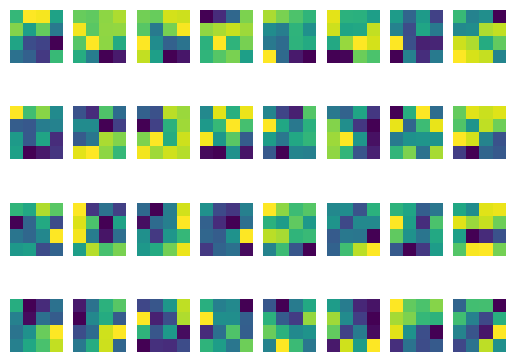

In [57]:
import matplotlib.pyplot as plt

# Assuming conv_layer_1_weights is a NumPy array with shape (4, 4, 1, 32)
for i in range(conv_layer_1_weights.shape[3]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(conv_layer_3_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.show()


In [34]:
#Function to plot the filters
def plot_filters(filters):
    num_filters = filters.shape[3]
    num_rows = num_cols = int(np.ceil(np.sqrt(num_filters)))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            if i*num_cols + j < num_filters:
                axes[i, j].imshow(filters[:, :, 0, i*num_cols + j], cmap='viridis')
                axes[i, j].axis('off')

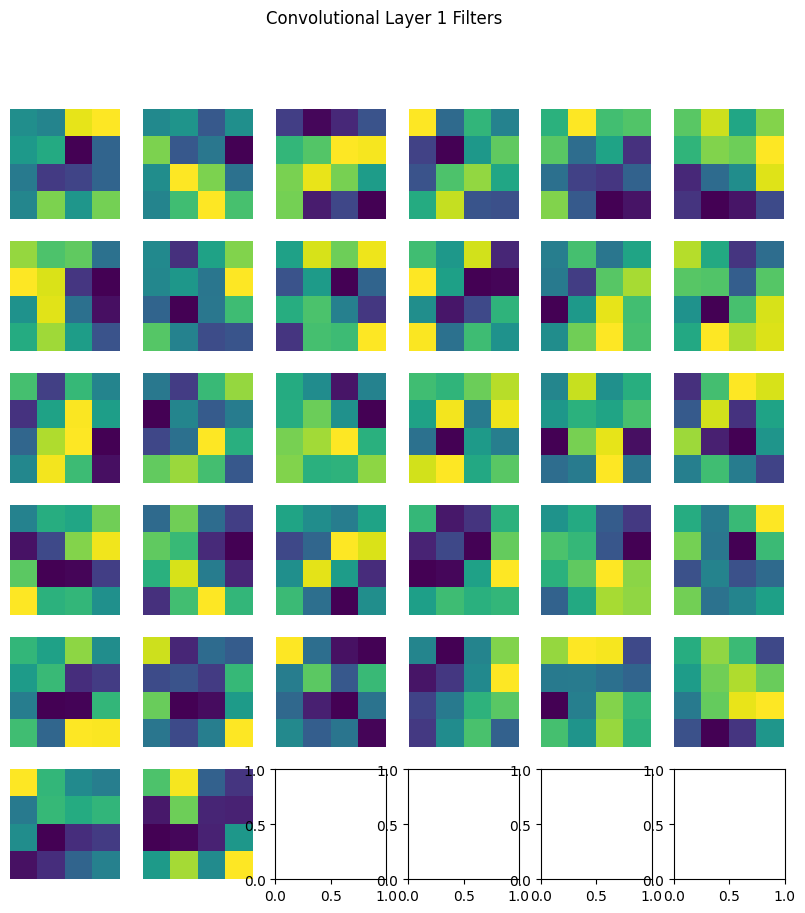

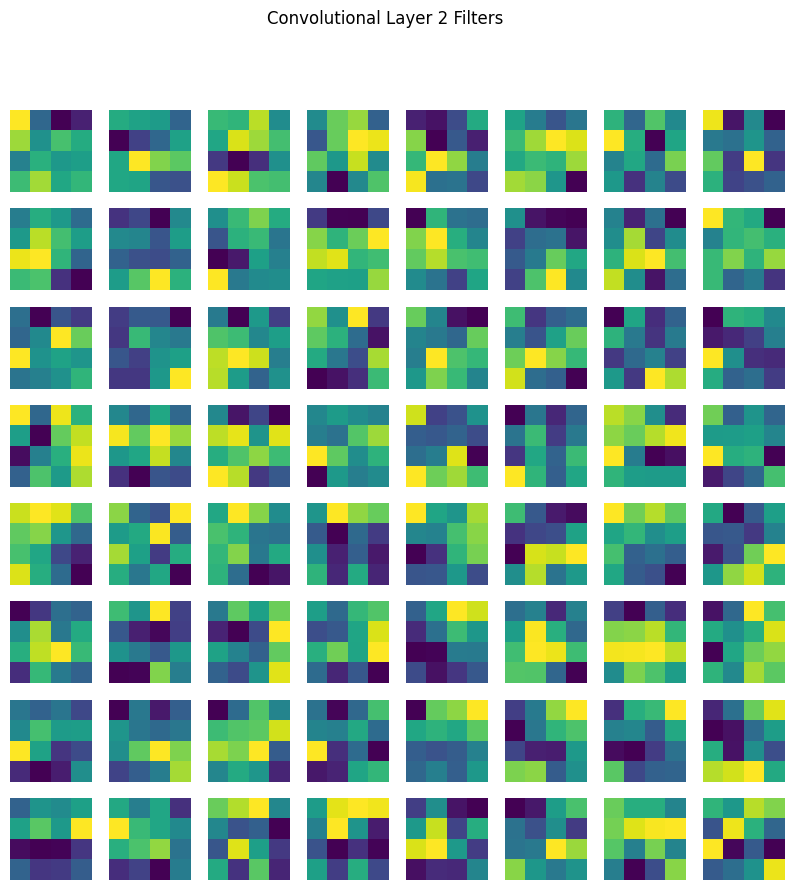

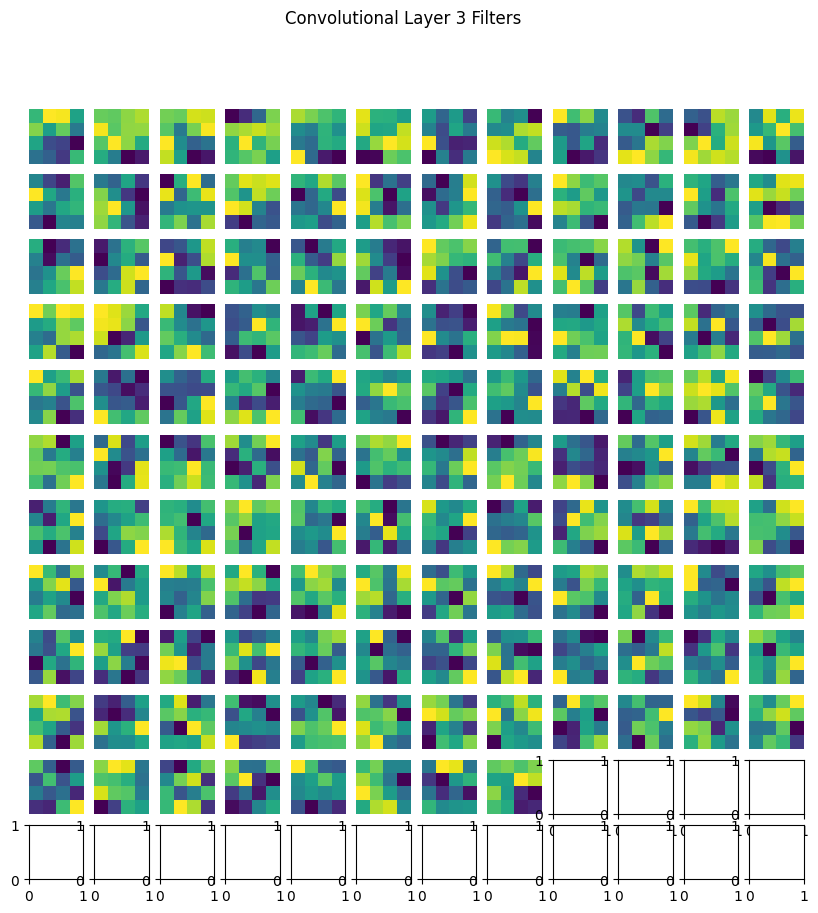

In [35]:
# Plot filters for each layer
plot_filters(conv_layer_1_weights)
plt.suptitle('Convolutional Layer 1 Filters', fontsize=12)
plt.show()

plot_filters(conv_layer_2_weights)
plt.suptitle('Convolutional Layer 2 Filters', fontsize=12)
plt.show()

plot_filters(conv_layer_3_weights)
plt.suptitle('Convolutional Layer 3 Filters', fontsize=12)
plt.show()


In [36]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 10)                20490     
                                                                 
Total params: 185066 (722.91 KB)
Trainable params: 185066 (722.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Plot activations for each layer for digits 2 and 9

1/1 [==============================] - 0s 61ms/step


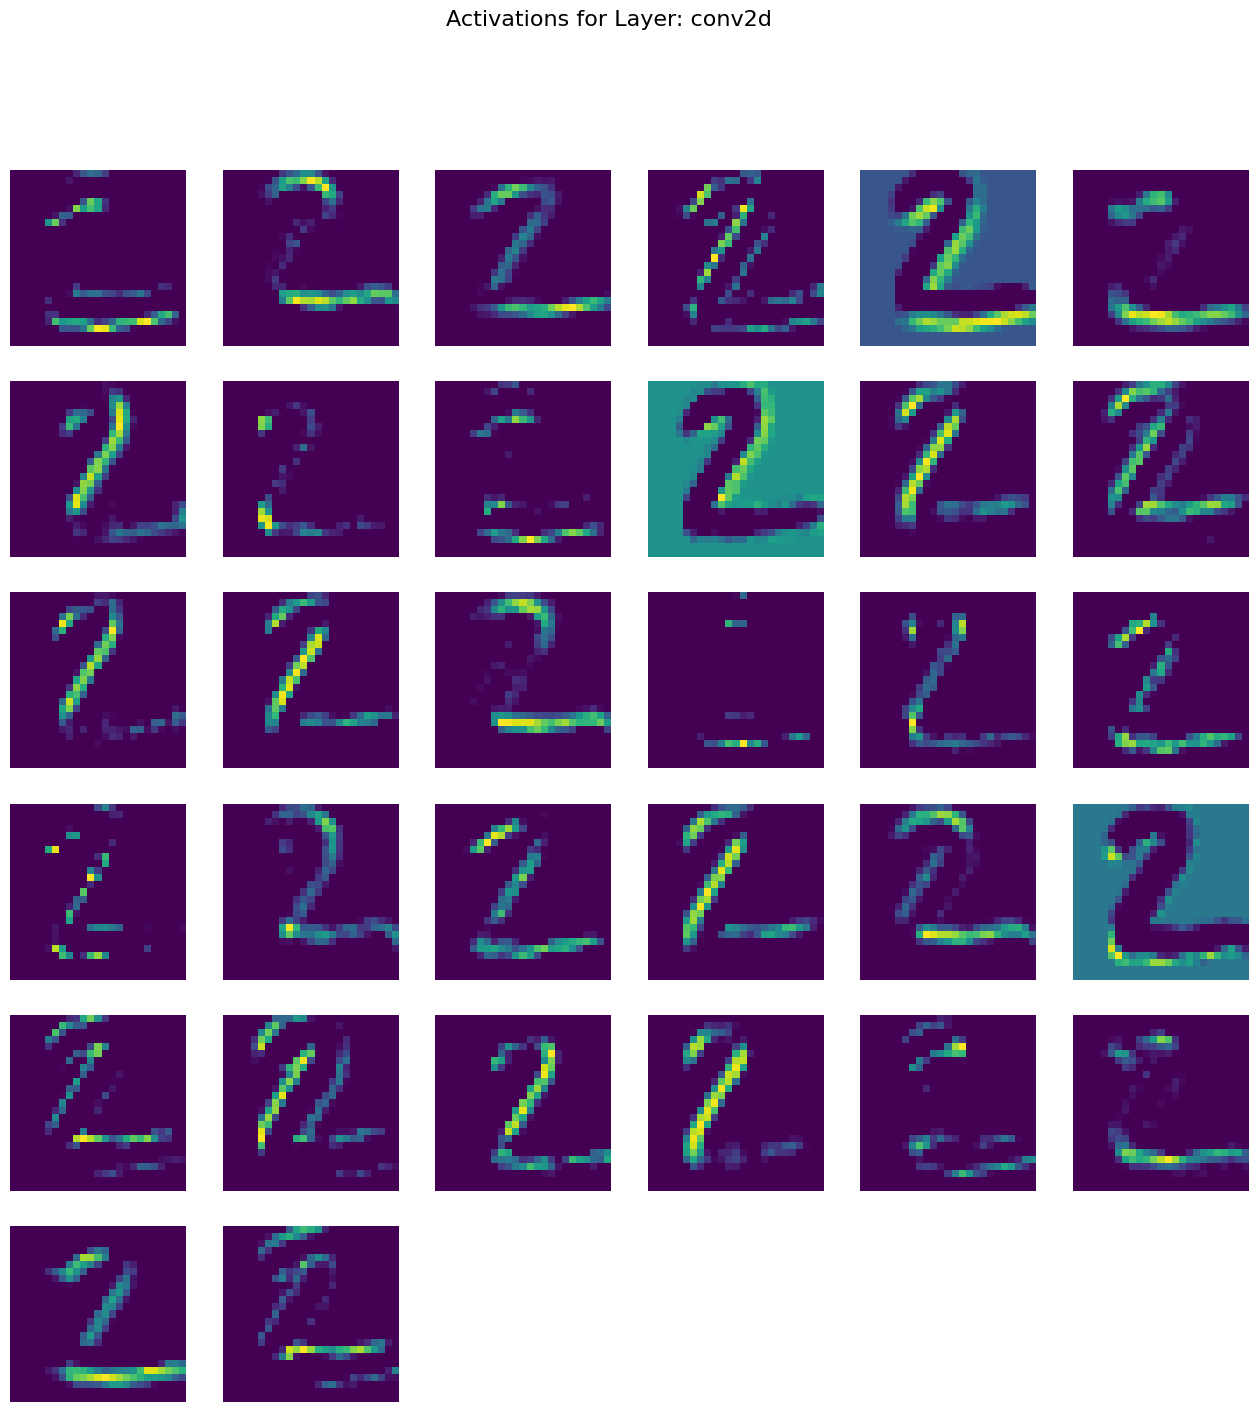

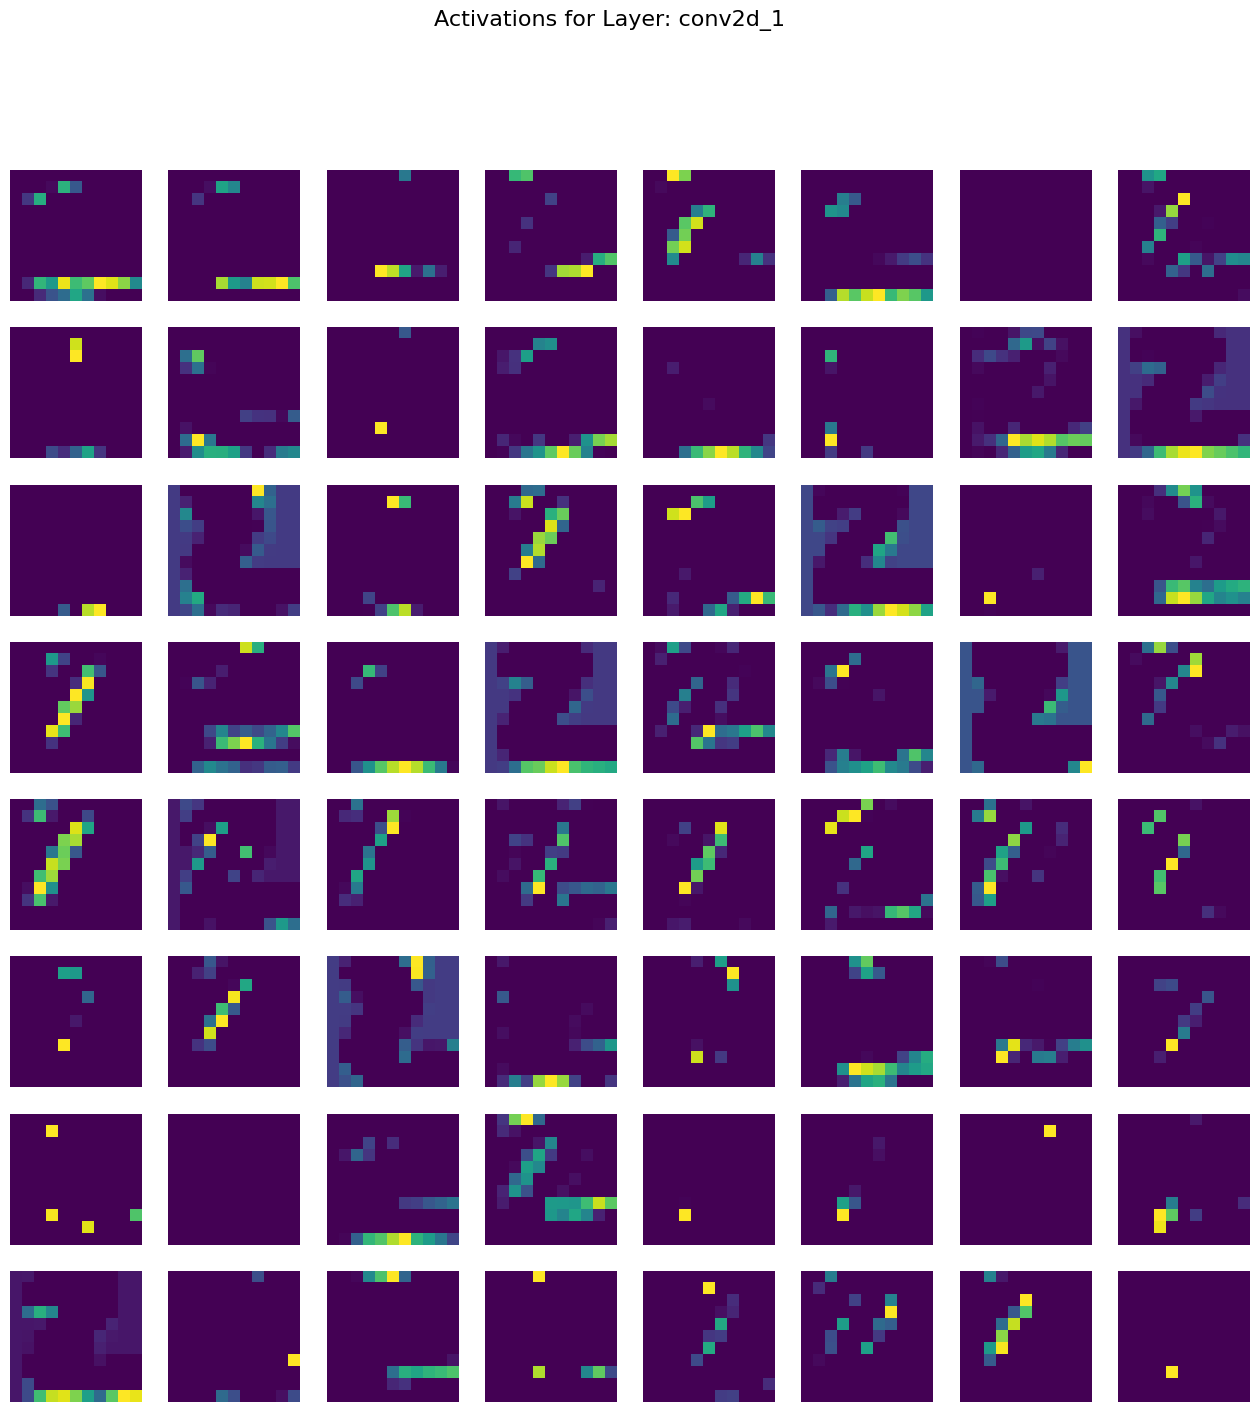

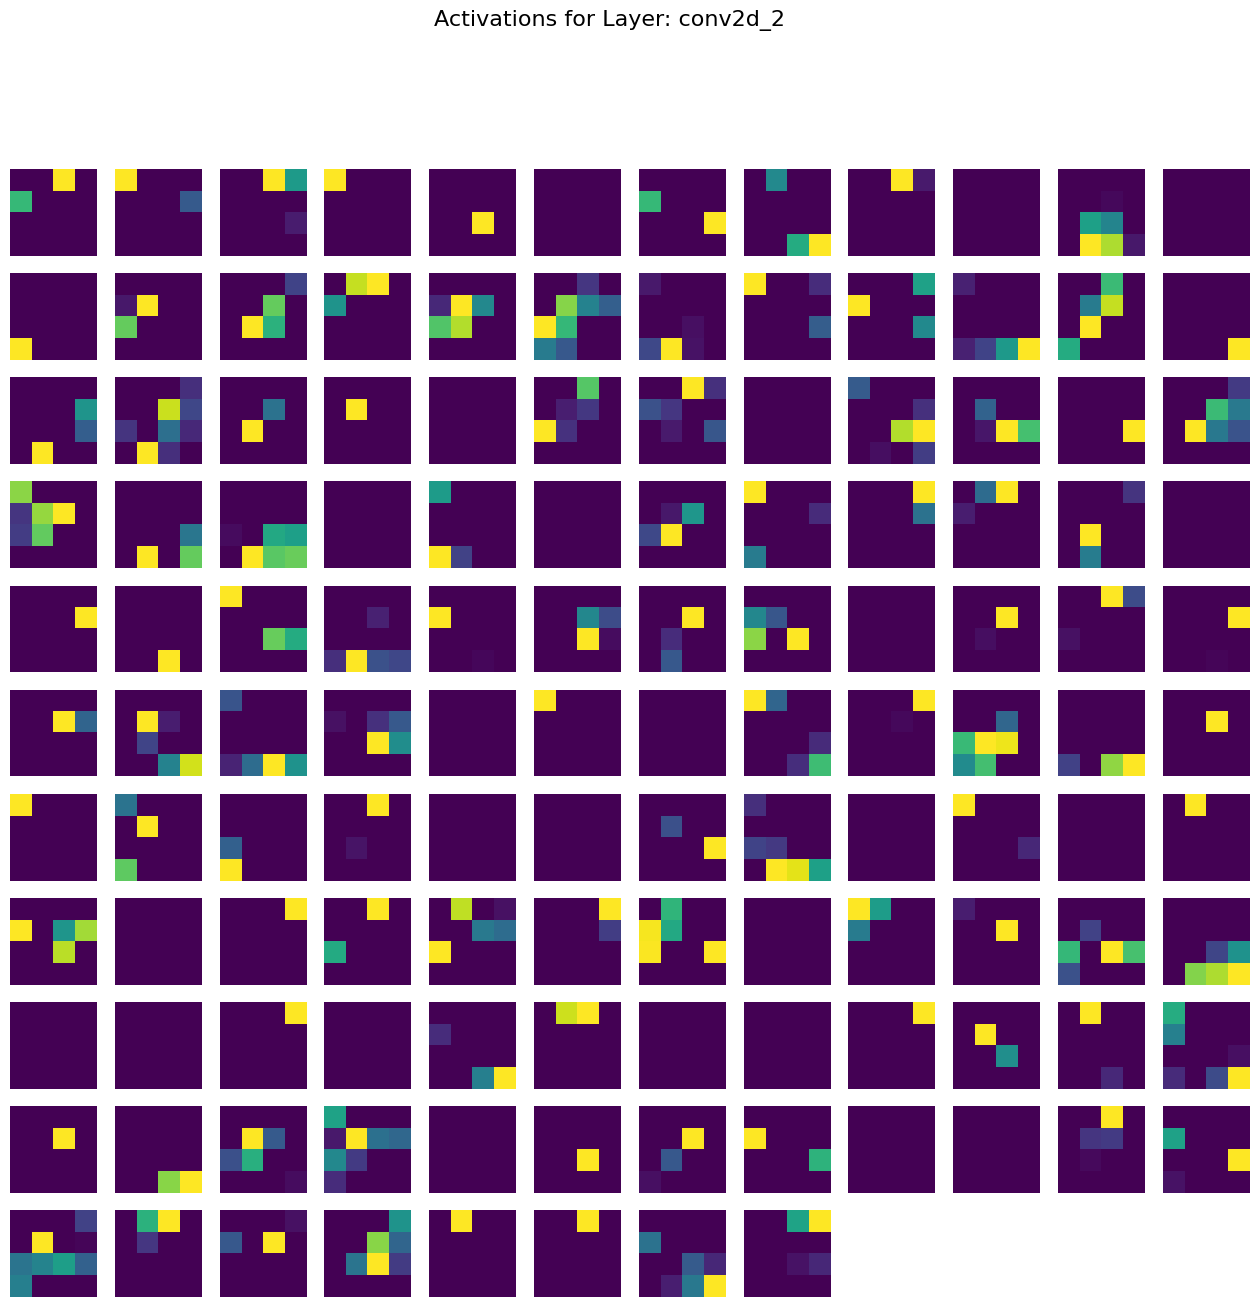

In [37]:
# Find indices from class '2' and two images from class '9' from test Data
class_2_indices = np.where(y_test_cnn == 2)[0][:2]
class_9_indices = np.where(y_test_cnn == 9)[0][:2]

# Get the respective images from the training set
selected_images = np.concatenate((x_test_cnn[class_2_indices], x_test_cnn[class_9_indices]))

#Create Labels for the 2 Digits
selected_labels = np.array([2, 2, 9, 9])

# Create sub-models for each layer in your CNN
layer_names = ['conv2d','conv2d_1', 'conv2d_2']

sub_models = [Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(layer_name).output) for layer_name in layer_names]

# Get activations for selected images
activations = [sub_model.predict(selected_images) for sub_model in sub_models]

# Plot activations for each layer
for layer_name, layer_activation in zip(layer_names, activations):
    num_features = layer_activation.shape[-1]
    num_cols = int(np.ceil(np.sqrt(num_features)))

    plt.figure(figsize=(16, 16))
    plt.suptitle(f'Activations for Layer: {layer_name}', fontsize=16)

    for i in range(num_features):
        plt.subplot(num_cols, num_cols, i + 1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()
